In [85]:
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/Asus/OneDrive/Desktop/gfgcourse/BLACKFRIDAY PROJECT/BlackFriday.csv")

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [10]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [12]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [14]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [16]:
df["User_ID"].nunique()

5891

In [18]:
df["User_ID"].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [20]:
df["Product_ID"].nunique()

3623

In [22]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [24]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [26]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [28]:
df["Purchase"].sum()

5017668378

In [30]:
for columns in df.columns:
    print(columns,":",df[columns].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


In [32]:
data=pd.DataFrame({"Ratio" :[len(df[df["Gender"]=="M"]),len(df[df["Gender"]=="F"])]},index=["Male","Female"])

<Axes: ylabel='Ratio'>

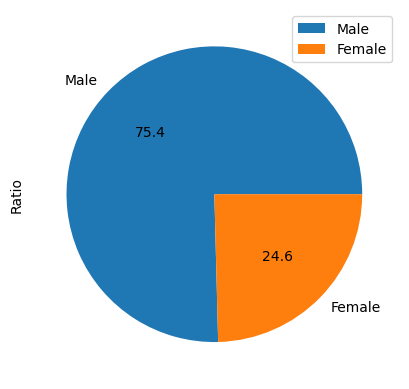

In [34]:
data.plot.pie(y="Ratio",autopct="%.1f")

<Axes: title={'center': 'Ratio'}>

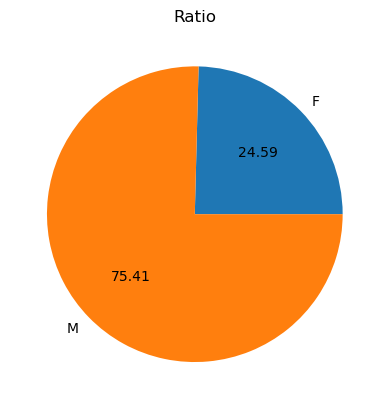

In [36]:
df.groupby('Gender').size().plot(kind="pie",autopct="%.2f",title="Ratio",)

In [ ]:
df.groupby("Gender").sum()["Purchase"].plot(kind="pie")

<Axes: ylabel='Purchase'>

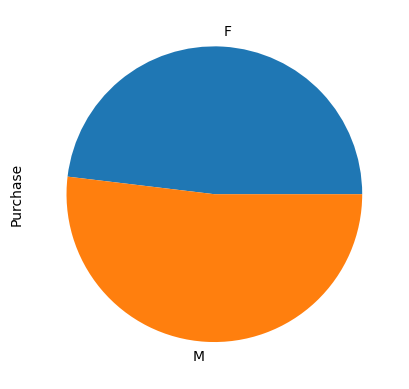

In [72]:
df.groupby("Gender")["Purchase"].mean().plot(kind="pie")

<Axes: title={'center': 'Purchase Distribution'}, xlabel='Age'>

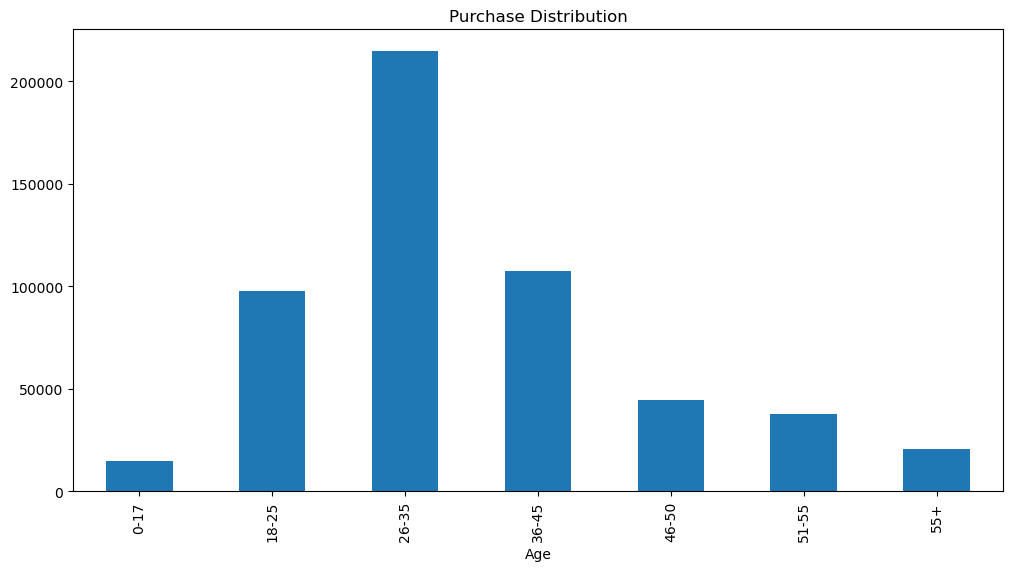

In [43]:
df.groupby("Age").size().plot(kind="bar",figsize=(12,6),title="Purchase Distribution")

In [50]:
lst=[]
for i in df["Age"].unique():
    lst.append([i,df[df["Age"]==i]["Product_ID"].nunique()])
data=pd.DataFrame(lst,columns=["Age","Products"])

In [54]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

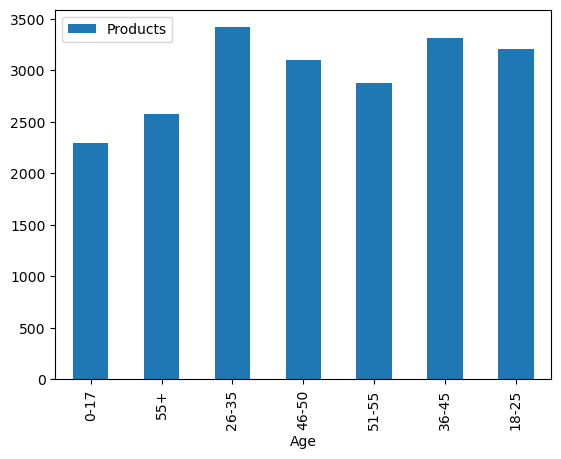

In [60]:
data.plot(kind="bar",x="Age")

<Axes: title={'center': 'Amt. spend by age'}, xlabel='Age'>

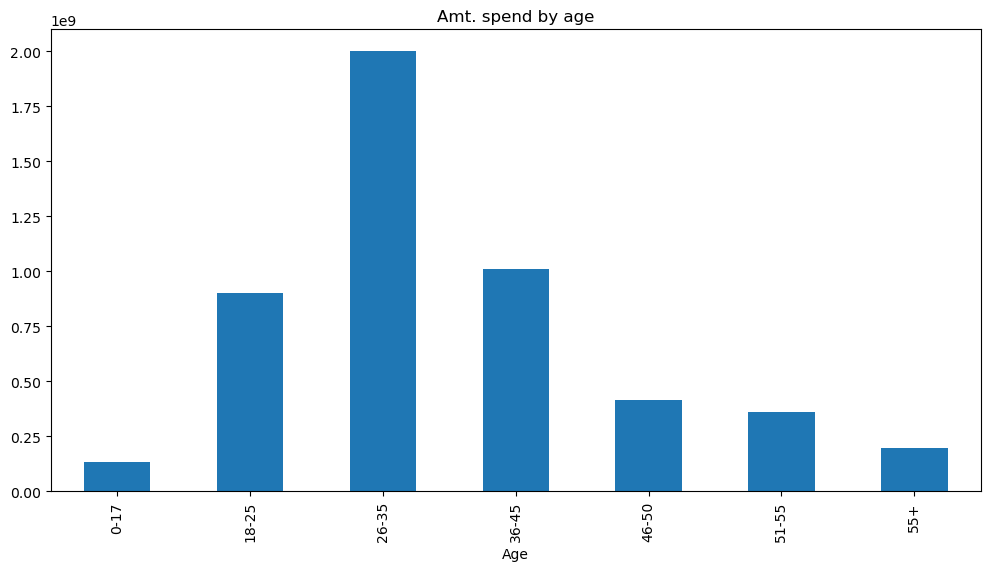

In [62]:
df.groupby("Age").sum()["Purchase"].plot(kind="bar",figsize=(12,6),title="Amt. spend by age")

In [68]:
df["Purchase"].dtype

dtype('int64')

<Axes: title={'center': 'Amt. spend by age'}, xlabel='Age'>

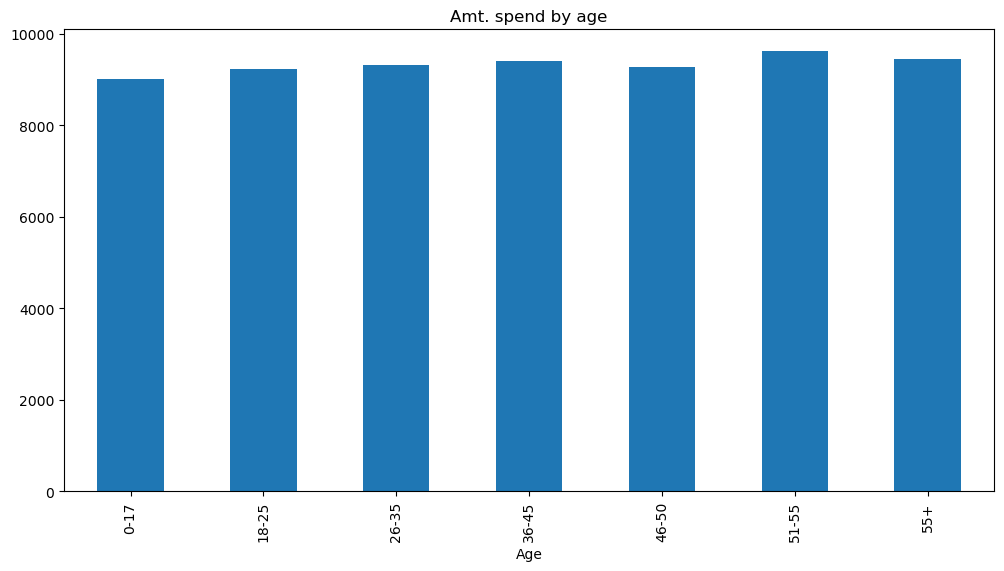

In [70]:
df.groupby("Age")["Purchase"].mean().plot(kind="bar",figsize=(12,6),title="Amt. spend by age")

<Axes: title={'center': 'Amt. spend by age'}, ylabel='Purchase'>

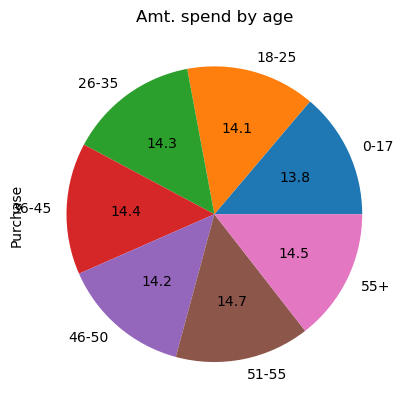

In [75]:
df.groupby("Age")["Purchase"].mean().plot(kind="pie",autopct="%0.1f",title="Amt. spend by age")

<Axes: >

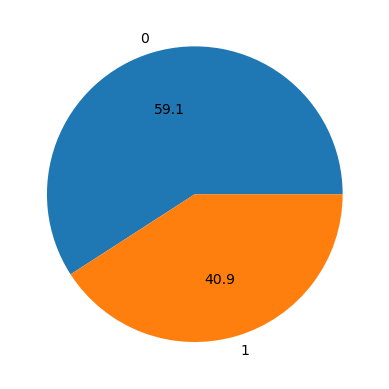

In [83]:
df.groupby("Marital_Status").size().plot(kind="pie",autopct="%0.1f")

<Axes: xlabel='Age', ylabel='count'>

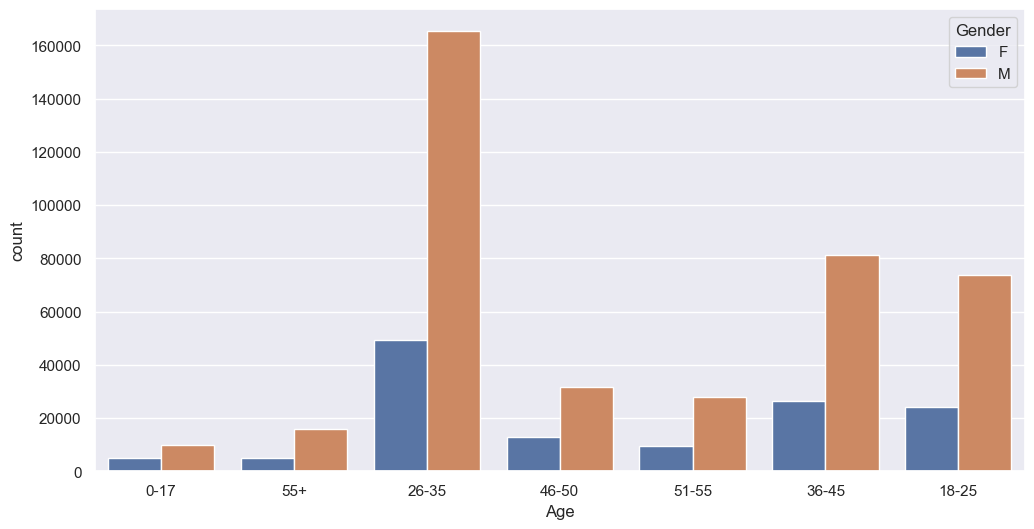

In [87]:
sns.set(rc={"figure.figsize":(12,6)})
sns.countplot(x="Age",hue="Gender",data=df)

<Axes: xlabel='Gender', ylabel='count'>

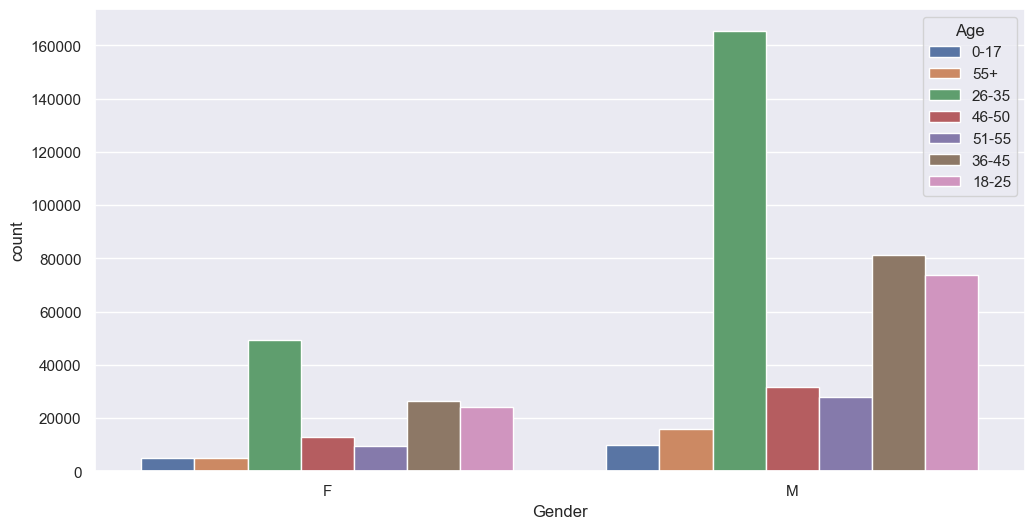

In [89]:
sns.set(rc={"figure.figsize":(12,6)})
sns.countplot(x="Gender",hue="Age",data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

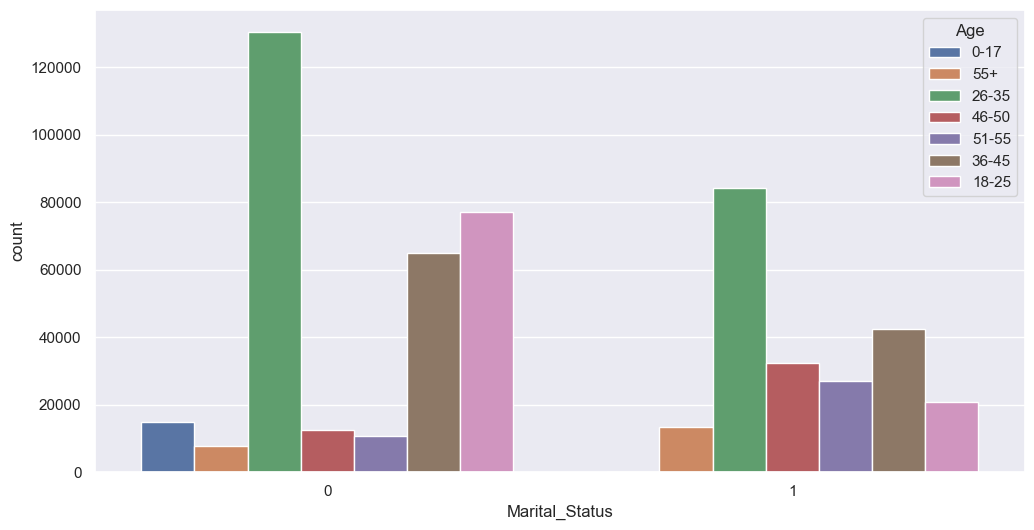

In [91]:
sns.set(rc={"figure.figsize":(12,6)})
sns.countplot(x="Marital_Status",hue="Age",data=df)

<Axes: xlabel='City_Category', ylabel='count'>

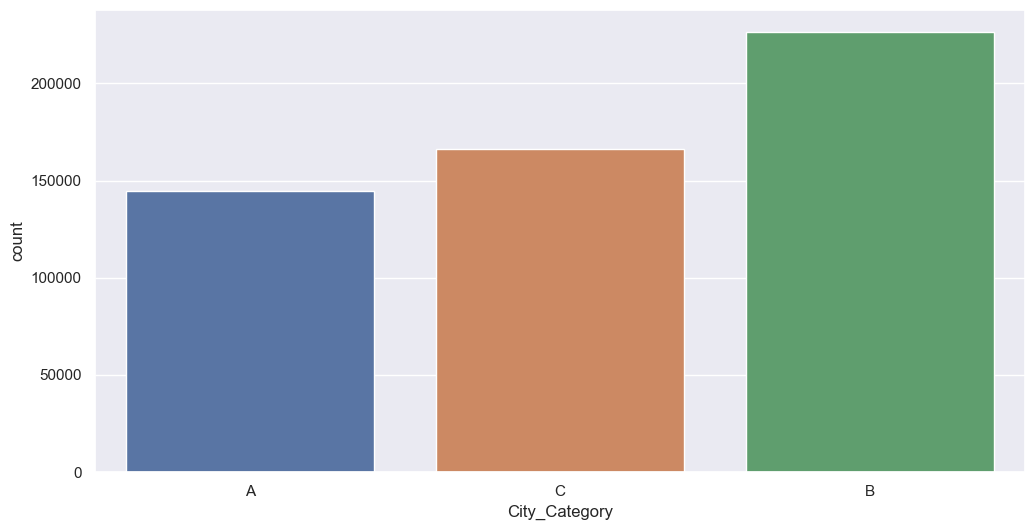

In [93]:
sns.countplot(x=df["City_Category"])

<Axes: >

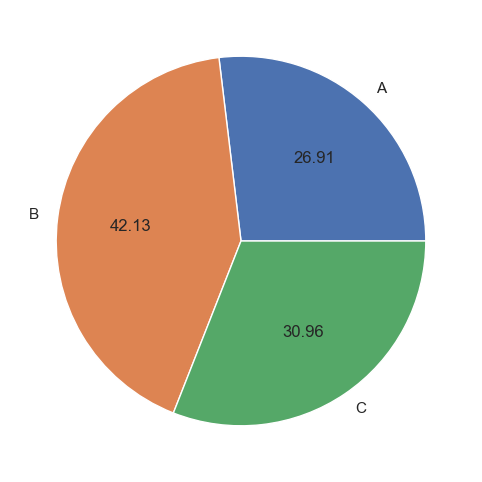

In [95]:
df.groupby("City_Category").size().plot(kind="pie",autopct="%.2f")

<Axes: xlabel='City_Category', ylabel='count'>

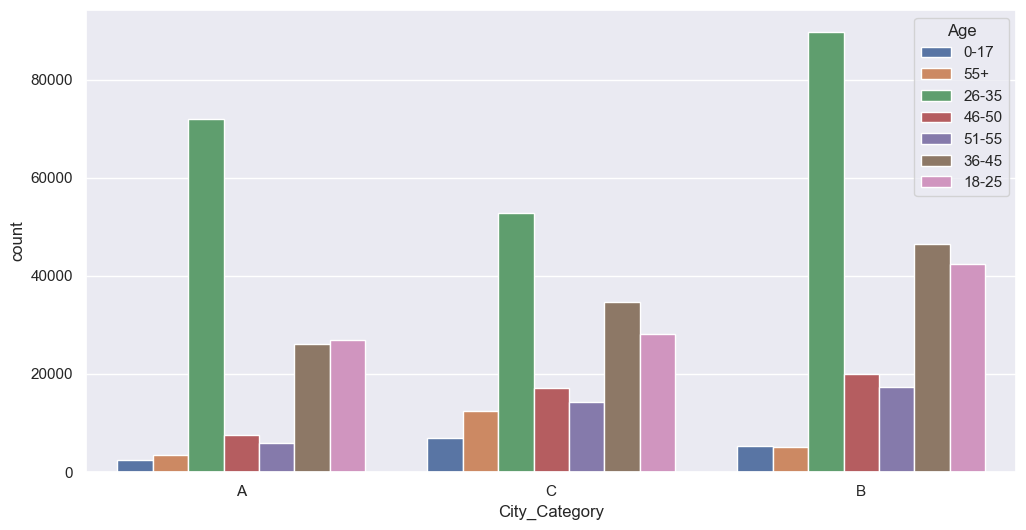

In [99]:
sns.countplot(x=df["City_Category"],hue="Age",data=df)

<Axes: ylabel='Purchase'>

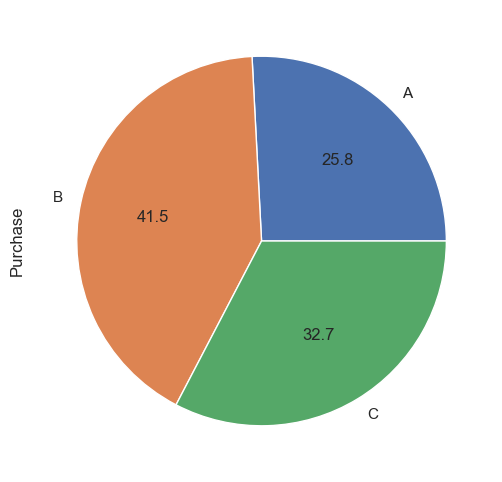

In [101]:
df.groupby("City_Category")["Purchase"].sum().plot(kind="pie",autopct="%0.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

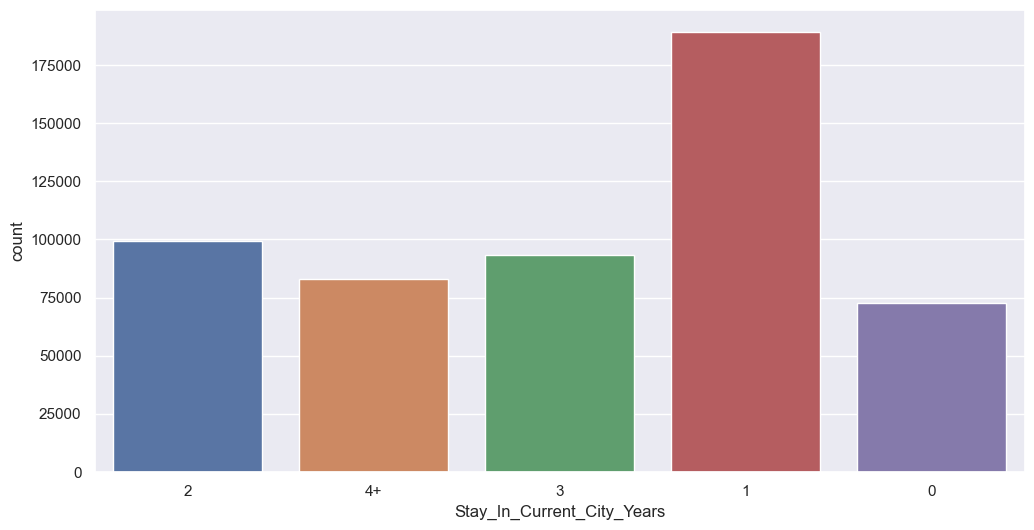

In [105]:
sns.countplot(x=df["Stay_In_Current_City_Years"])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

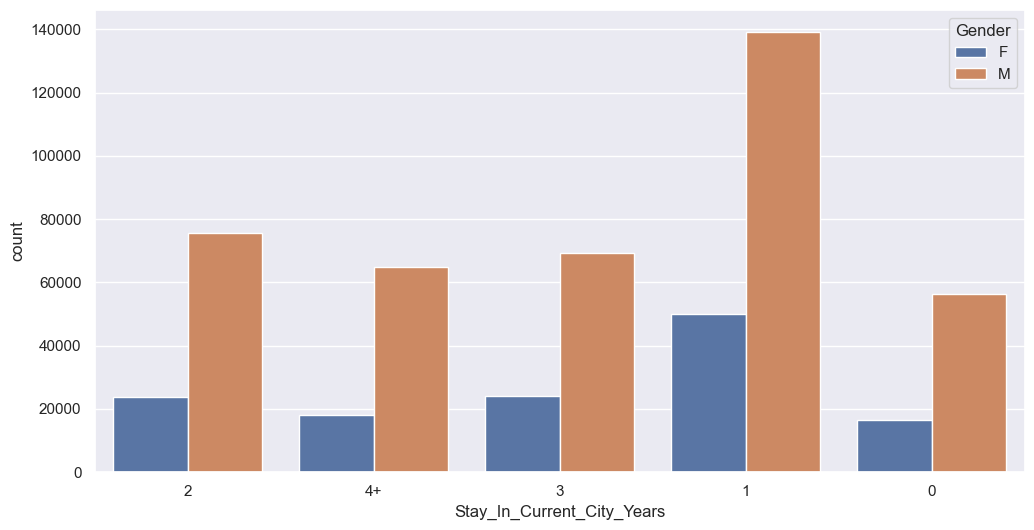

In [107]:
sns.countplot(x=df["Stay_In_Current_City_Years"],hue="Gender",data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

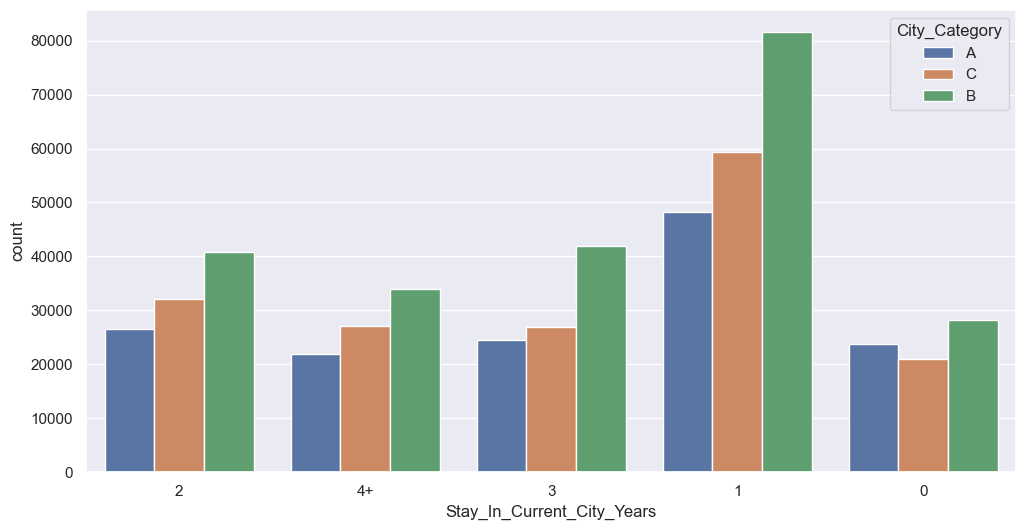

In [109]:
sns.countplot(x=df["Stay_In_Current_City_Years"],hue="City_Category",data=df)

<Axes: >

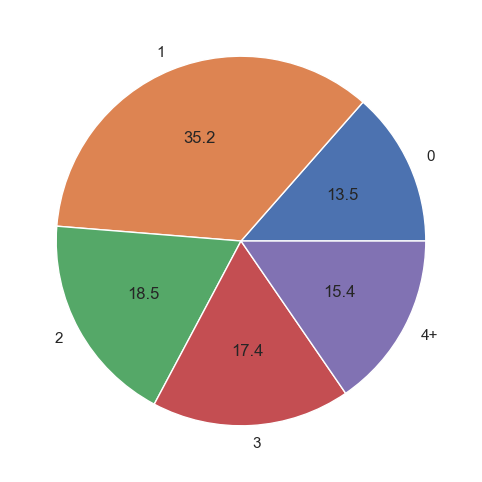

In [123]:
df.groupby("Stay_In_Current_City_Years").size().plot(kind="pie",autopct="%0.1f")

<Axes: xlabel='Stay_In_Current_City_Years'>

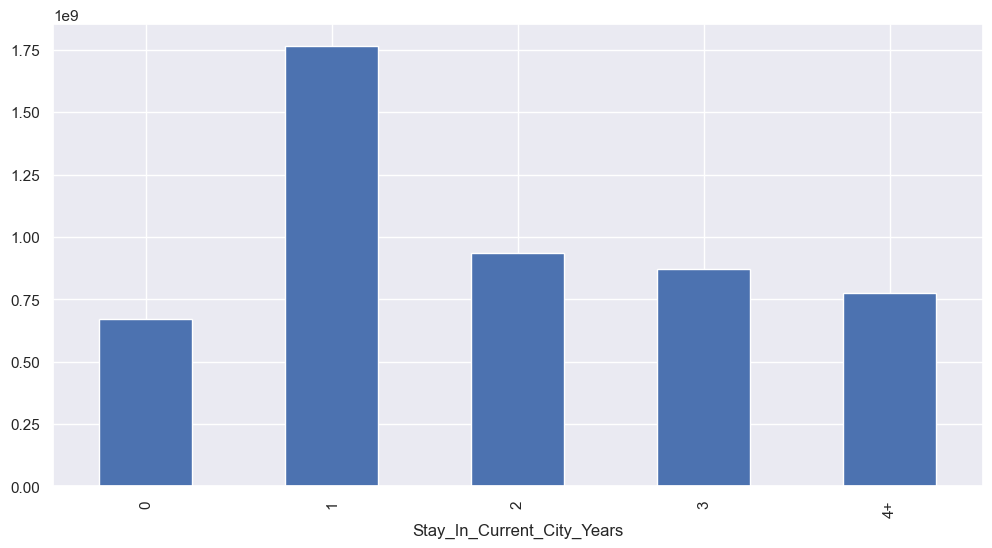

In [127]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].sum().plot(kind="bar")

<Axes: xlabel='Occupation', ylabel='count'>

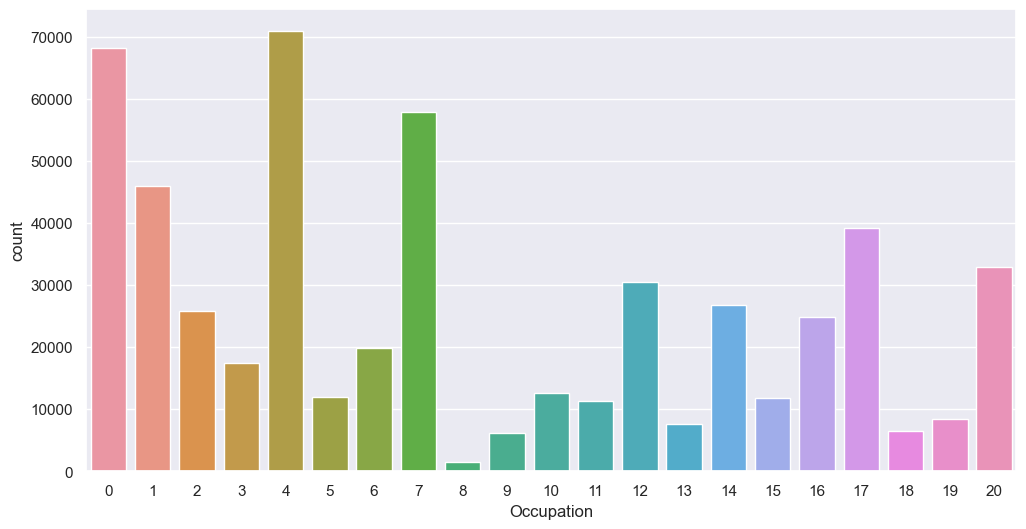

In [129]:
sns.countplot(x=df["Occupation"])

<Axes: xlabel='Occupation'>

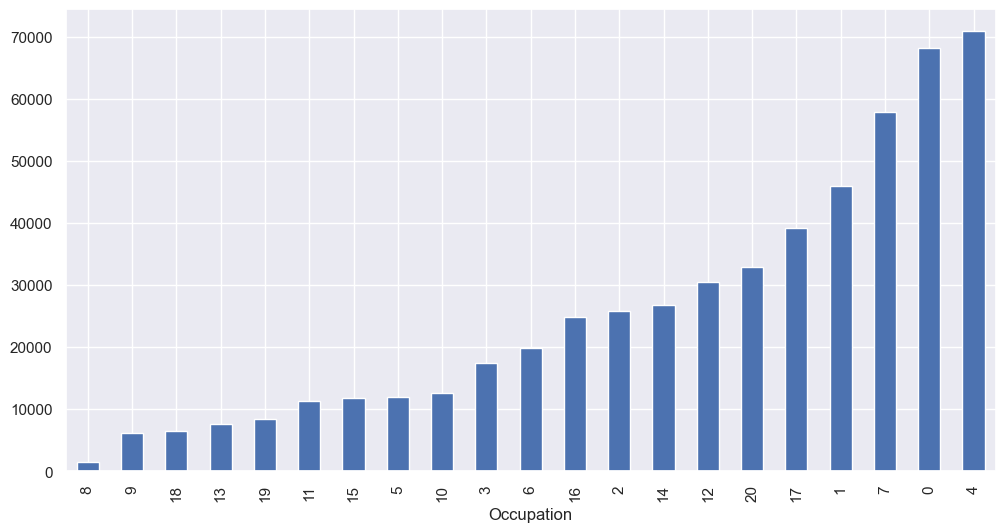

In [133]:
df.groupby("Occupation").size().sort_values().plot(kind="bar")

In [135]:
df.groupby("Occupation").size().sort_values()

Occupation
8      1524
9      6153
18     6525
13     7548
19     8352
11    11338
15    11812
5     11985
10    12623
3     17366
6     19822
16    24790
2     25845
14    26712
12    30423
20    32910
17    39090
1     45971
7     57806
0     68120
4     70862
dtype: int64

In [2]:
sns.countplot(x="Occupation",hue="Marital_Status",data=df)

NameError: name 'sns' is not defined

<Axes: xlabel='Occupation', ylabel='count'>

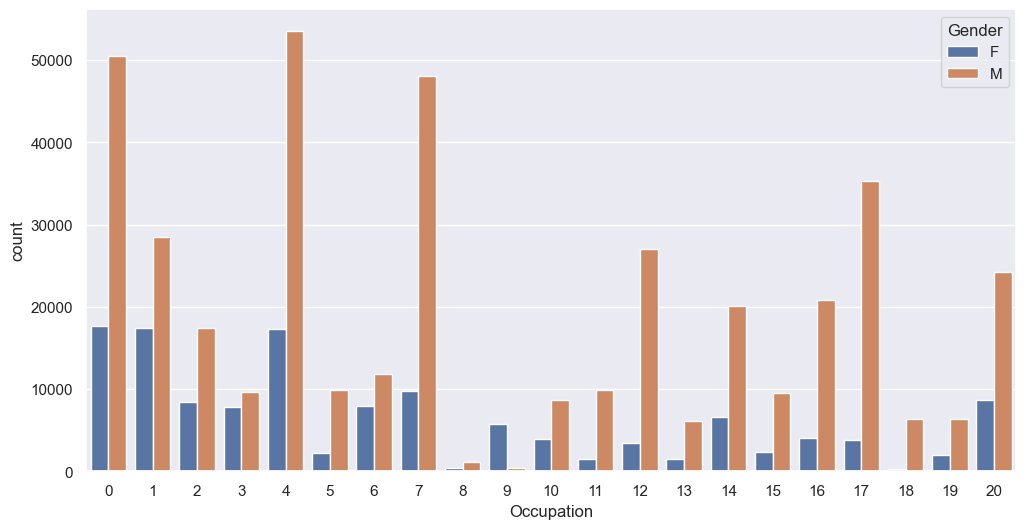

In [139]:
sns.countplot(x="Occupation",hue="Gender",data=df)

<Axes: xlabel='Occupation'>

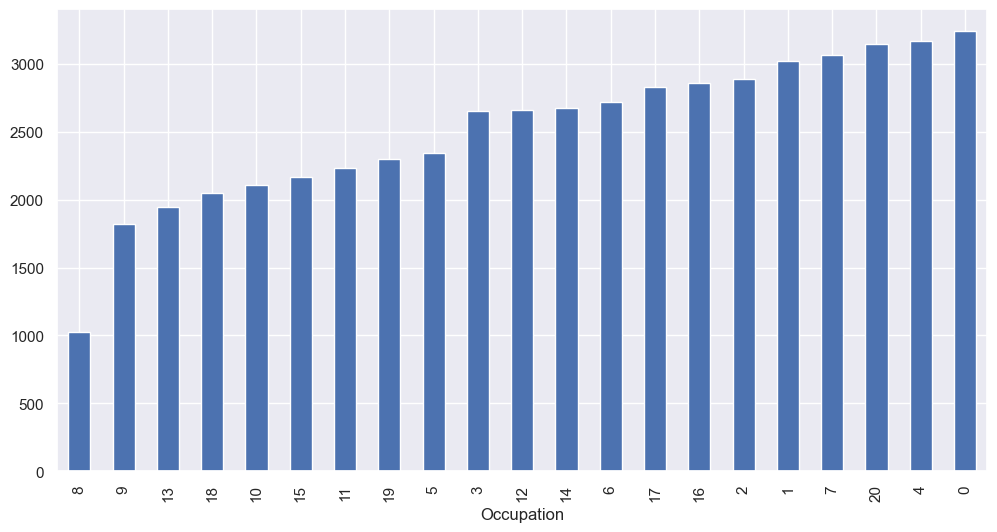

In [143]:
df.groupby("Occupation").nunique()["Product_ID"].sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

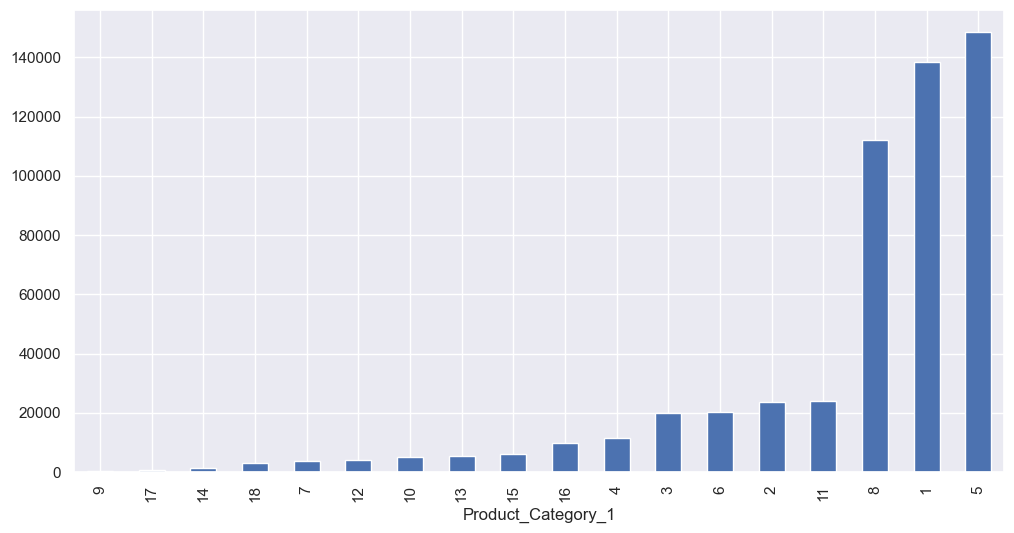

In [149]:
df.groupby("Product_Category_1").size().sort_values().plot(kind="bar")

## plotting the top 10 most purchased product

<Axes: xlabel='Product_ID'>

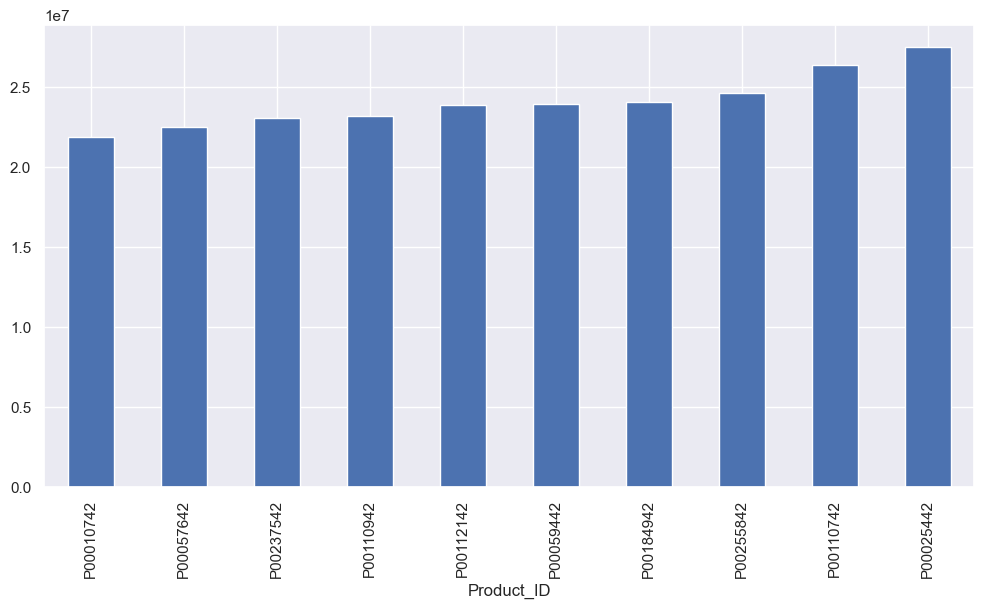

In [153]:
df.groupby("Product_ID").sum()["Purchase"].nlargest(10).sort_values().plot(kind="bar")

<Axes: xlabel='Product_ID'>

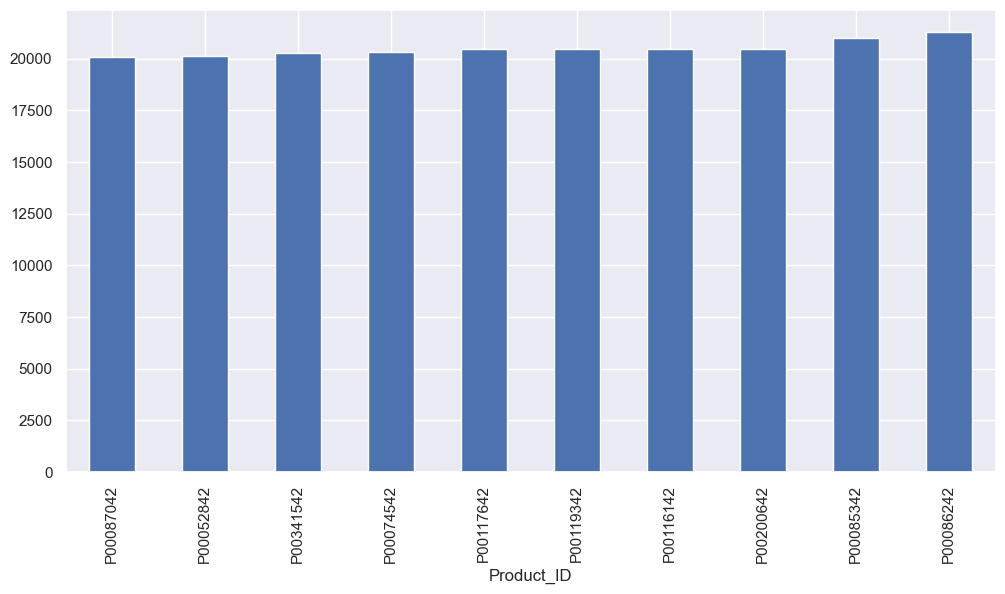

In [158]:
df.groupby("Product_ID")["Purchase"].mean().nlargest(10).sort_values().plot(kind="bar")

## COMBINING AGE AND MARITAL STATUS

In [161]:
l=[]
for i in range(len(df)):
    l.append(df["Gender"][i]+":"+str(df["Marital_Status"][i]))

df["Marital_Gender"]=l

In [162]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F:0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F:0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F:0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F:0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M:0


<Axes: xlabel='Marital_Gender', ylabel='count'>

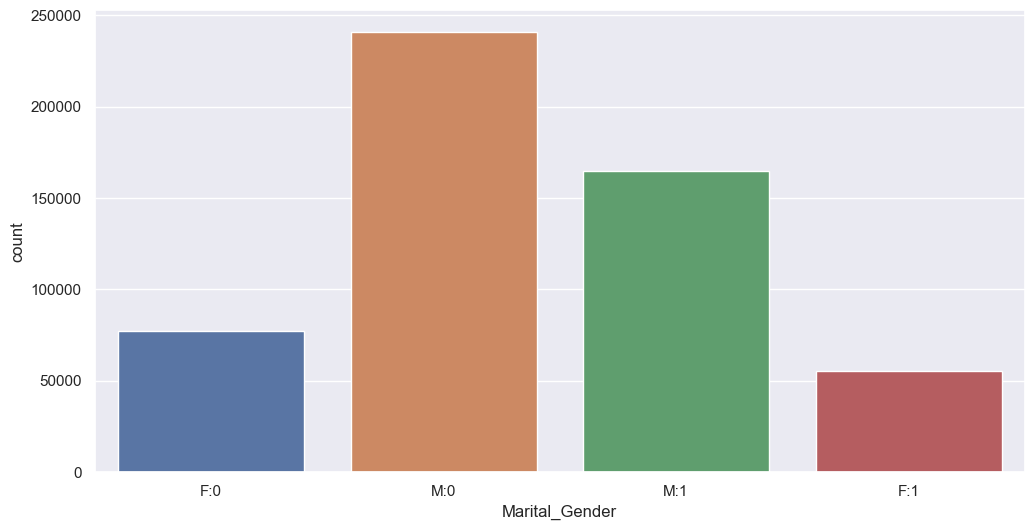

In [165]:
sns.countplot(x=df["Marital_Gender"])

<Axes: xlabel='Marital_Gender', ylabel='count'>

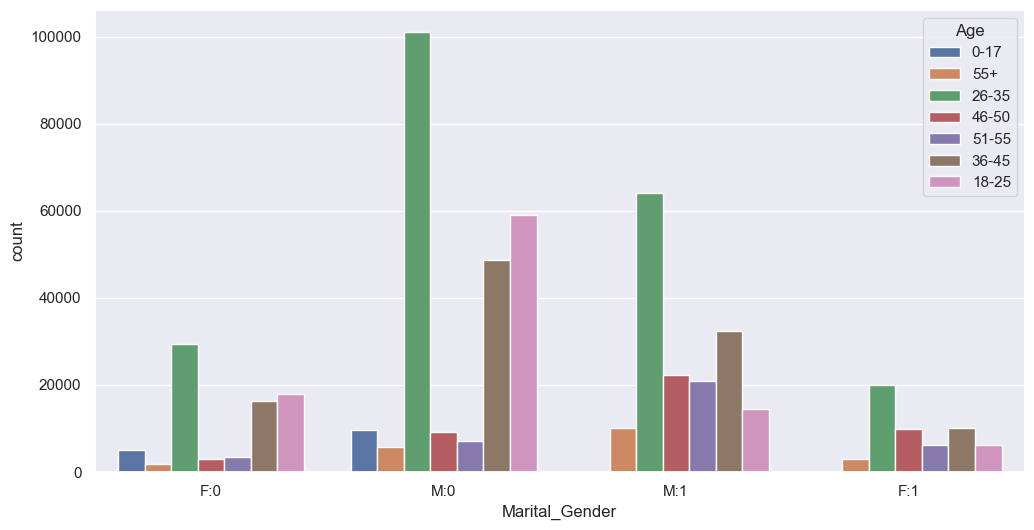

In [169]:
sns.countplot(x=df["Marital_Gender"],hue="Age",data=df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

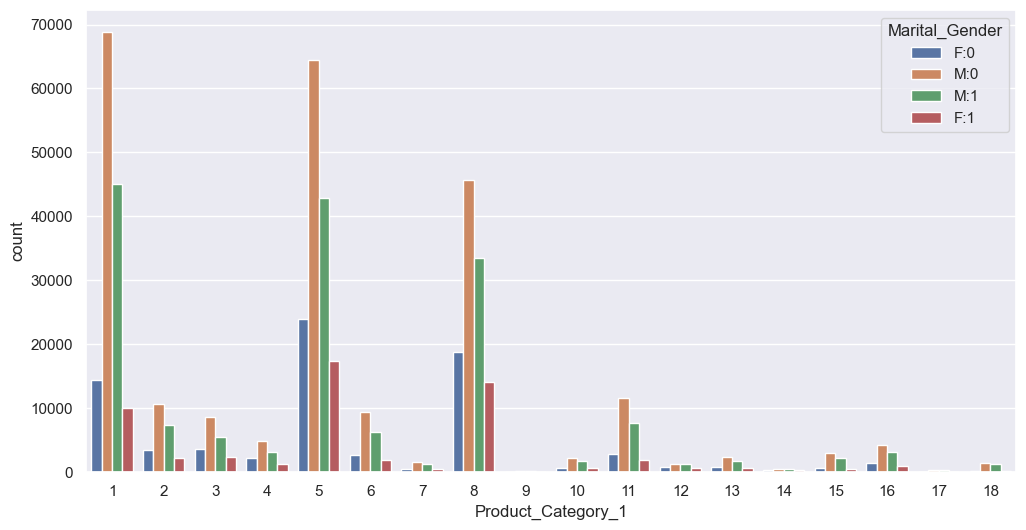

In [171]:
sns.countplot(x=df["Product_Category_1"],hue="Marital_Gender",data=df)

<Axes: xlabel='City_Category', ylabel='count'>

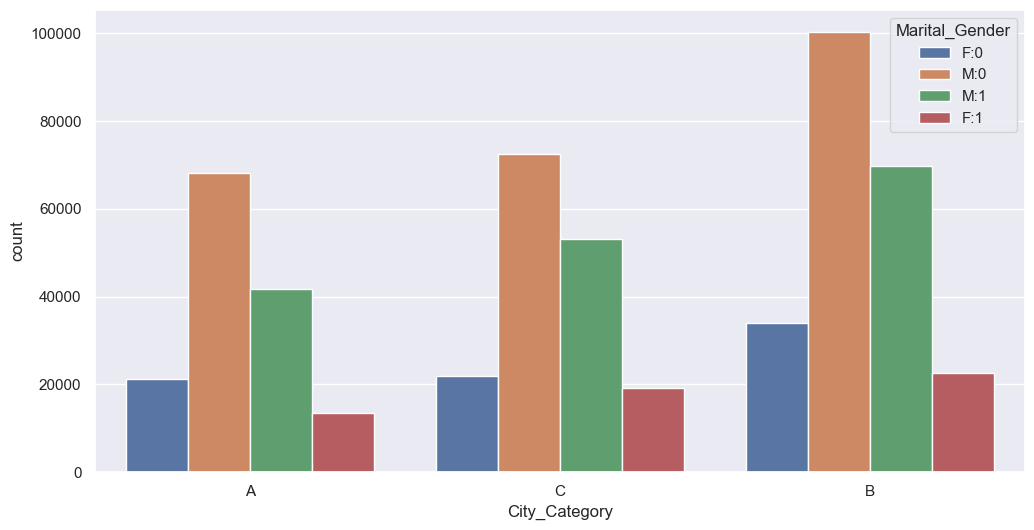

In [173]:
sns.countplot(x=df["City_Category"],hue="Marital_Gender",data=df)